Le dataset Titanic est l'un des ensembles de données les plus célèbres en science des données et apprentissage automatique. Il représente une compilation d'informations sur les passagers du tristement célèbre voyage inaugural du RMS Titanic, qui a eu lieu en avril 1912. Le navire a heurté un iceberg et a coulé, entraînant la perte de nombreuses vies. Ce dataset contient des détails sur divers aspects des passagers, tels que leur âge, sexe, classe de billet, port d'embarquement, etc. L'objectif est généralement de prédire si un passager a survécu ou non, ce qui en fait un problème de classification binaire.

# **Étape 1: Définition et Compréhension du Problème :**
La première étape cruciale dans tout projet de science des données consiste à définir et comprendre le problème auquel nous faisons face. Dans le cas du dataset Titanic, plusieurs aspects sont à considérer :

**Domaine d'Application :**
Le domaine d'application est le transport maritime, avec un accent particulier sur la sécurité des passagers à bord des navires.

**Compréhension du Problème :**
Le problème sous-jacent est de prédire la survie des passagers en fonction de diverses caractéristiques individuelles. Il s'agit d'un problème de classification binaire, où chaque passager est étiqueté comme ayant survécu (1) ou non survécu (0).

**Objectifs :**
Améliorer la compréhension des facteurs qui ont influencé la survie des passagers du Titanic.
Développer un modèle de machine learning capable de prédire la survie des passagers en fonction de leurs caractéristiques.

**Identifications des Données Nécessaires :**
Pour atteindre ces objectifs, nous avons besoin de données détaillées sur les passagers, y compris des informations telles que l'âge, le sexe, la classe de billet, le nombre de membres de la famille à bord, etc.

**Explication et Évaluation des Résultats :**
Une compréhension approfondie du problème nous permettra de choisir les bonnes techniques d'analyse, d'expliquer les résultats obtenus et de démontrer l'utilité des informations extraites pour améliorer la sécurité des voyages maritimes.

In [11]:
pip install pandas numpy matplotlib seaborn


# **Étape 2: Collecte des données**

In [12]:
import pandas as pd

# Charger le dataset Titanic depuis Kaggle
titanic_data = pd.read_csv("Train.csv")

# Afficher les premières lignes du dataset pour vérification
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# **Étape 3: Prétraitement**

In [13]:
# Vérifier les valeurs manquantes
print(titanic_data.isnull().sum())

# Supprimer les colonnes inutiles
titanic_data = titanic_data.drop(['Cabin', 'Ticket'], axis=1)

# Gérer les données manquantes
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Afficher les statistiques descriptives
print(titanic_data.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


# **Étape 4: Transformation**

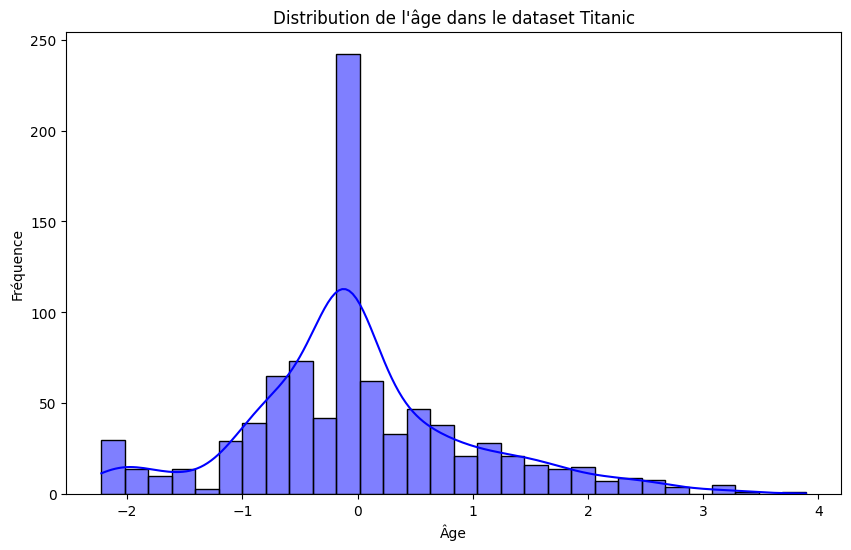

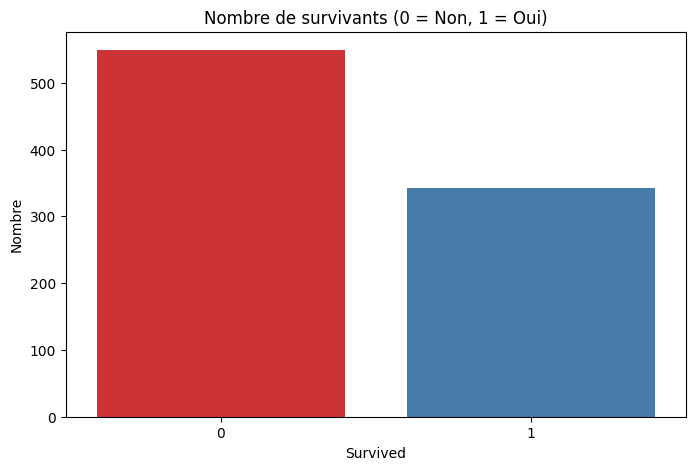

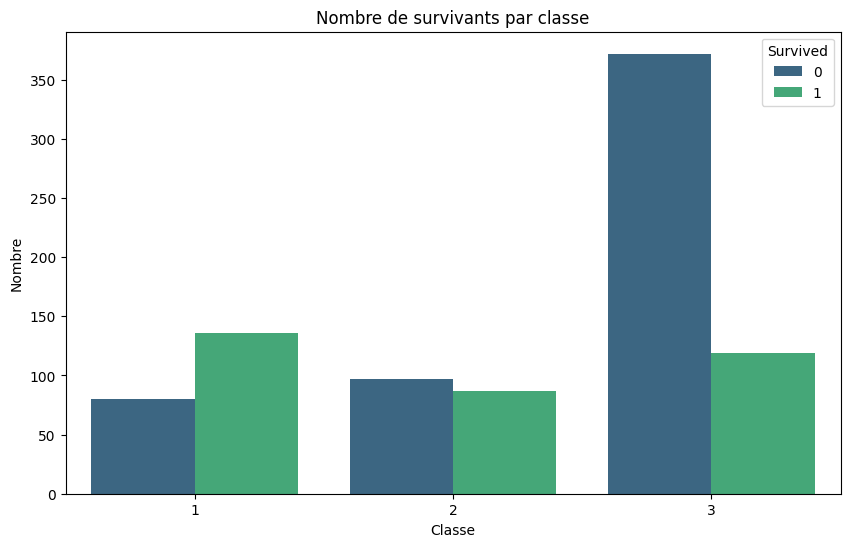

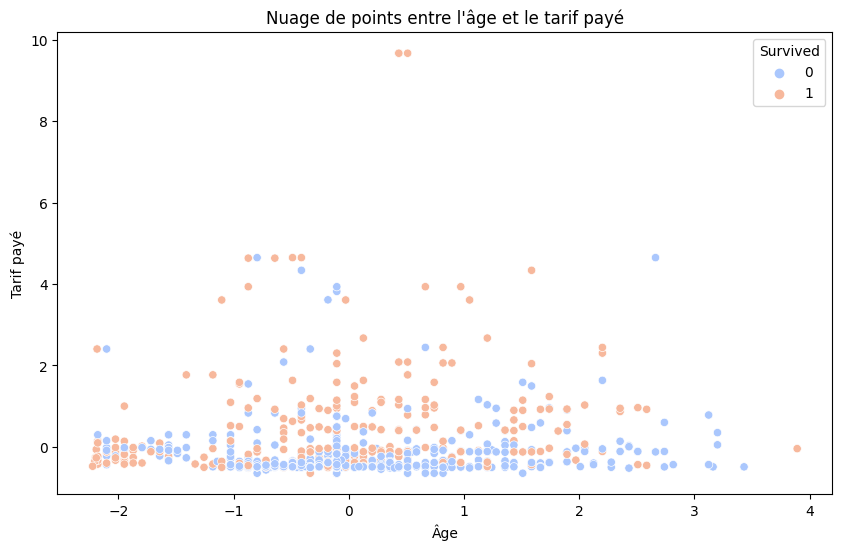

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des données
# Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution de l\'âge dans le dataset Titanic')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

# Diagramme en barres pour le nombre de survivants
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=titanic_data, palette='Set1')
plt.title('Nombre de survivants (0 = Non, 1 = Oui)')
plt.xlabel('Survived')
plt.ylabel('Nombre')
plt.show()

# Diagramme en barres pour le nombre de survivants en fonction de la classe
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='viridis')
plt.title('Nombre de survivants par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre')
plt.show()

# Nuage de points entre l'âge et le tarif payé
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_data, hue='Survived', palette='coolwarm')
plt.title('Nuage de points entre l\'âge et le tarif payé')
plt.xlabel('Âge')
plt.ylabel('Tarif payé')
plt.show()


In [14]:
# Encoder les variables catégorielles
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Normaliser les données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Créer de nouveaux attributs si nécessaire
# Exemple : créer une nouvelle colonne 'FamilySize' en additionnant 'SibSp' et 'Parch'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']


# **Étape 5: Data Mining (Modèle)**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Diviser les données en features (X) et target (y)
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

# Exclure les colonnes non numériques
X_train = X_train.select_dtypes(include=[int, float])
X_test = X_test.select_dtypes(include=[int, float])

# Initialiser le modèle
model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7262569832402235
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       105
           1       0.68      0.64      0.66        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179

Confusion Matrix:
 [[83 22]
 [27 47]]


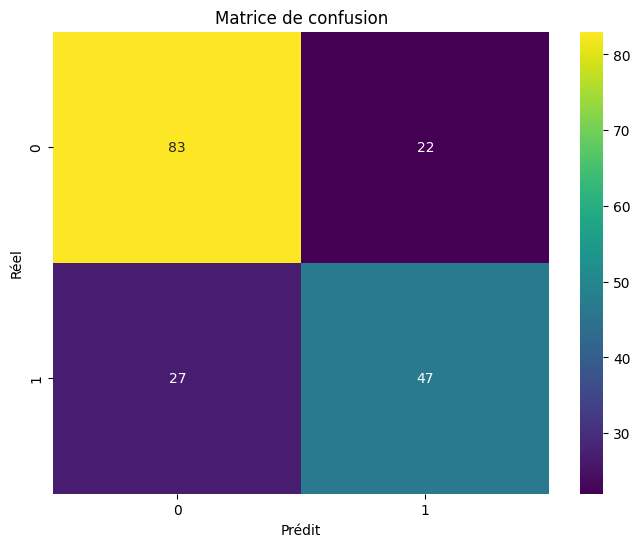

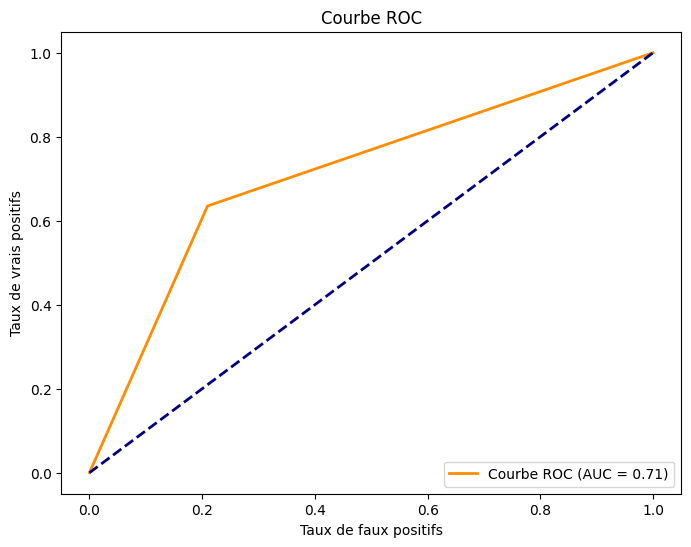

In [21]:
# Visualisation des résultats
# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d')
plt.title('Matrice de confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

print('\n')

# Courbe ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# **Visualisation des Résultats :**
**Matrice de confusion :** Visualisation des vrais positifs, vrais négatifs, faux positifs et faux négatifs.
**Courbe ROC :** Visualisation des performances du modèle en termes de taux de faux positifs et de vrais positifs.

Le modèle développé a montré une certaine capacité à prédire la survie des passagers du Titanic en fonction des caractéristiques fournies. Les graphiques de la matrice de confusion et de la courbe ROC fournissent une évaluation détaillée des performances du modèle. Ce projet de data science a permis de mieux comprendre les étapes du processus, de la collecte des données à l'évaluation du modèle. Des ajustements peuvent être apportés pour améliorer davantage la performance du modèle ou pour explorer davantage les relations entre les variables.